In [1]:
# Importing libraries for data analysis and visualization
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For advanced statistical data visualization
import matplotlib.ticker as ticker  # For customizing tick locators on plots
from matplotlib.ticker import FuncFormatter  # For formatting tick labels

# Importing libraries for geospatial analysis and visualization
import folium  # For interactive map creation
from folium.plugins import HeatMap  # For adding heatmap layers to maps

# Importing libraries for machine learning
from sklearn.cluster import KMeans  # For clustering analysis
from sklearn.preprocessing import StandardScaler  # For feature scaling and normalization

# Additional visualization tools for color management
import matplotlib.cm as cm  # For working with colormaps
import matplotlib.colors as mcolors  # For color manipulation and customization


## Load the data

In [2]:
# Load the dataset
file_path = "cleaned_properties.csv"  # The cvs file should be on the same directory
df = pd.read_csv(file_path)

# Covert the Size from an Object String to a number
df['Size']=df['Size'].str.replace(',','').astype(float)

## Pricing plots

### Housing Price Histogram - Overall Market

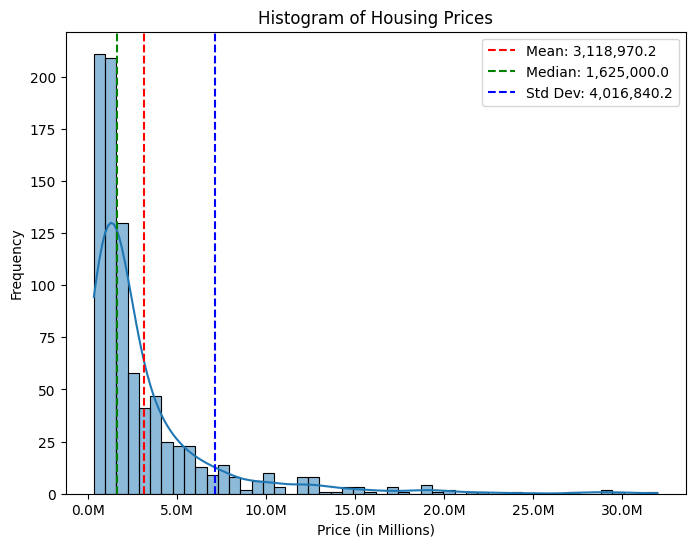

In [3]:
# Calculate mean, median, and standard deviation
mean_price = df['Price'].mean()
median_price = df['Price'].median()
std_dev_price = df['Price'].std()

# Function to format the x-axis values in millions
def millions(x, pos):
    return f'{x * 1e-6:,.1f}M'
formatter = FuncFormatter(millions)

# Create the histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True, bins=50)

# Add vertical lines for mean, median, and standard deviation
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: {mean_price:,.1f}')
plt.axvline(median_price, color='green', linestyle='--', label=f'Median: {median_price:,.1f}')
plt.axvline(mean_price + std_dev_price, color='blue', linestyle='--', label=f'Std Dev: {std_dev_price:,.1f}')

# Customize the plot
plt.title('Histogram of Housing Prices')
plt.xlabel('Price (in Millions)')
plt.ylabel('Frequency')
plt.legend()

# Use the formatter for the x-axis
plt.gca().xaxis.set_major_formatter(formatter)

# Save the figure, so later on can be used in the report
plt.savefig('Histogram_Housing_Prices.jpg', dpi=100)

plt.show()


### Overlaid Pricing Histogram Grouped by Property Type

C:\Users\jaime\AppData\Local\Temp\ipykernel_16716\2360979132.py:8: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.histplot(


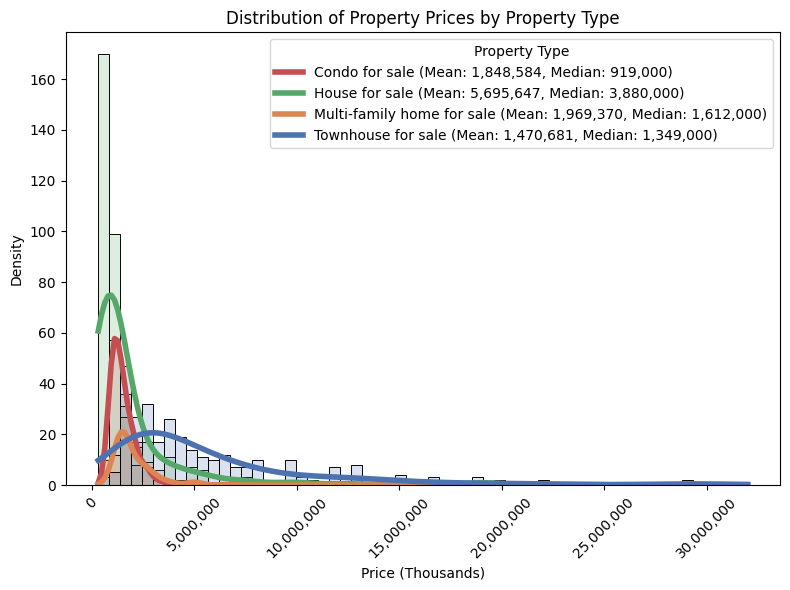

In [4]:
## >> Overlaid Histograms << ##

# Define a color palette for better differentiation
colors = sns.color_palette("deep")  # Adjust the palette name as desired

# Create the histogram with transparency and line thickness adjustments
plt.figure(figsize=(8, 6))
sns.histplot(
    x="Price",
    hue="Property Type",
    data=df,
    alpha=0.2,
    kde=True,
    palette=colors,
    line_kws={'linewidth': 4}  # Adjust KDE line thickness
)

# Calculate means and medians for each property type
means = df.groupby("Property Type")["Price"].mean()
medians = df.groupby("Property Type")["Price"].median()

# Customize legend entries with means and medians
legend_labels = [f"{label} (Mean: {means[label]:,.0f}, Median: {medians[label]:,.0f})" for label in means.index]

# Format the x-axis with thousands separators
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title("Distribution of Property Prices by Property Type")
plt.xlabel("Price (Thousands)")
plt.ylabel("Density")
plt.legend(title="Property Type", labels=legend_labels)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure, so later on can be used in the report
plt.savefig('Histogram_Property_Types.jpg', dpi=100)
plt.show()

### Cluster Bar Chart with the Median and Mean grouped by Property Type

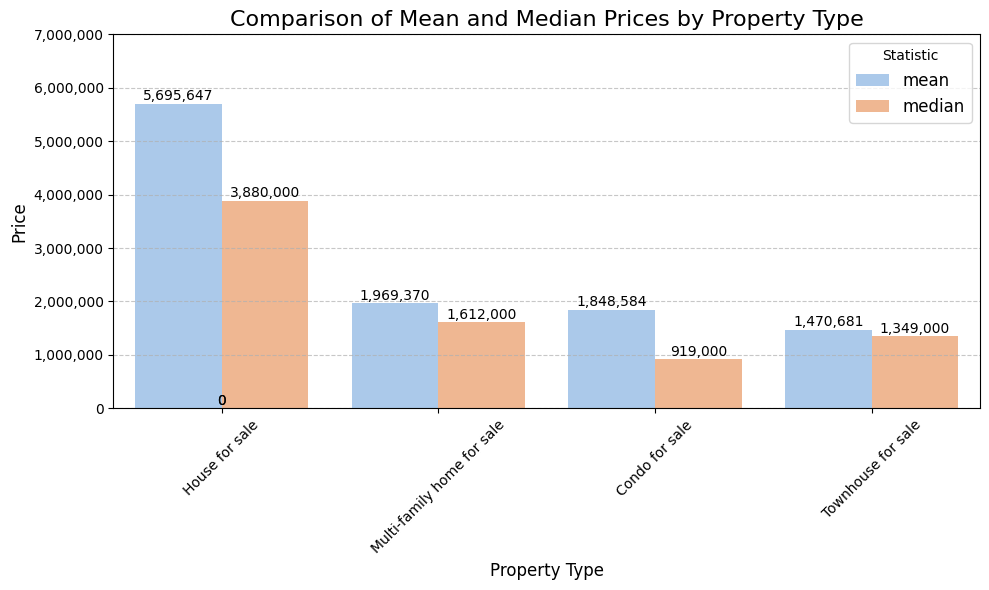

In [5]:

# Calculate the mean and median for each property type
df_summary = df.groupby('Property Type')['Price'].agg(['mean', 'median']).reset_index()

# Sort by mean price in descending order
df_summary = df_summary.sort_values(by='mean', ascending=False)

# Melt the DataFrame to long format for easier plotting
df_melted = df_summary.melt(id_vars='Property Type', var_name='Statistic', value_name='Price')

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Property Type', y='Price', hue='Statistic', data=df_melted, palette="pastel")

# Get the current axes object (assuming seaborn creates it by default)
ax = plt.gca()

# Format the y-axis to display thousands
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the y-axis limits
plt.ylim(0, 7000000)

# Add mean and median values as annotations with improved positioning
for p in ax.patches:
    value = p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{value:,.0f}', (x + p.get_width() / 2, y + value + 10000), ha='center', va='bottom')

# Customize the plot
plt.title('Comparison of Mean and Median Prices by Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Statistic', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figure, so later on can be used in the report
plt.savefig('Metrics_Property_Types.jpg', dpi=100)
plt.show()

### Pie Chart: Distribution of Property Types

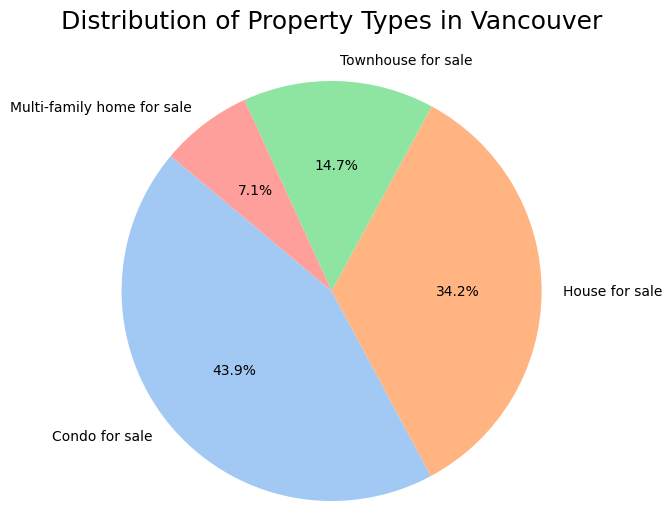

In [6]:

# Assuming your DataFrame is named 'df' and the property type column is named 'Property Type'
property_counts = df['Property Type'].value_counts()

# Create the pie chart with pastel colors
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")  # Set the pastel color palette
plt.pie(property_counts, labels=property_counts.index, autopct='%1.1f%%', startangle=140)

# Adjust title and legend position and font size
plt.title('Distribution of Property Types in Vancouver', fontsize=18, y=1.05)
#plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the figure, so later on can be used in the report
plt.savefig('Distribution_Property_Types.jpg', dpi=100)
plt.show()


## Size Analysis

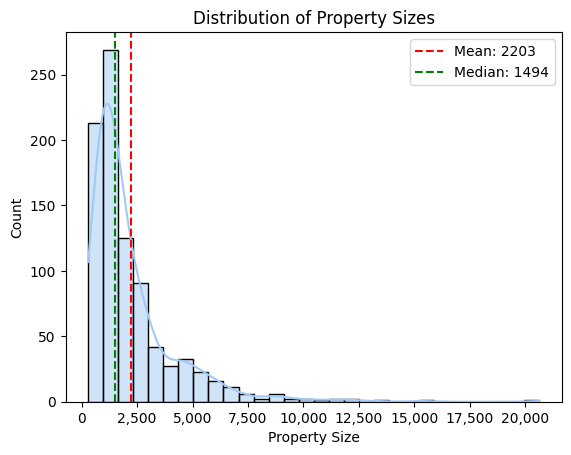

In [7]:
# Calculate mean and median
mean_size = df['Size'].mean()
median_size = df['Size'].median()

# Create the histogram
sns.histplot(data=df, x='Size', bins=30, kde=True)

# Format the x-axis labels with commas
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add mean and median lines
plt.axvline(mean_size, color='red', linestyle='--', label=f'Mean: {mean_size:.0f}')
plt.axvline(median_size, color='green', linestyle='--', label=f'Median: {median_size:.0f}')

# Customize the plot
plt.title('Distribution of Property Sizes')
plt.xlabel('Property Size')
plt.ylabel('Count')
plt.legend()
plt.show()

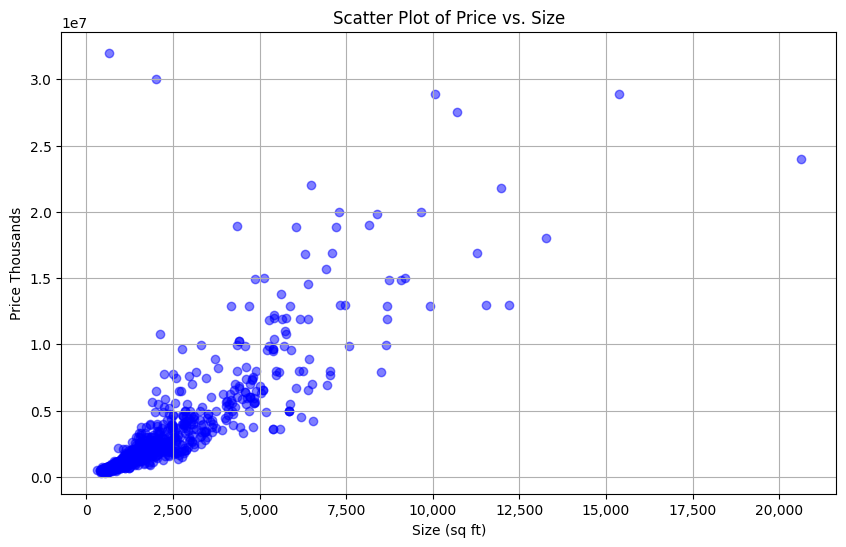

In [8]:
# Calculate mean and median for size
mean_size = df['Size'].mean()
median_size = df['Size'].median()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Size'], df['Price'], c='blue', alpha=0.5)
plt.title('Scatter Plot of Price vs. Size')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price Thousands')
plt.grid(True)

# Format the x-axis labels with commas
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

## Clustering geospatial 

In [9]:
''' 
For geospatial analysis, obtaining the coordinates of properties is essential. 
You can use postal codes as reference points to achieve this.

The dataset named CanadianPostalCodes202403.csv can be utilized to merge both datasets.
This merged data will provide the necessary coordinates to proceed with 
the geospatial analysis.
 
'''
# Create a DataFrame with only the postal codes
postal_code = pd.DataFrame(df['Postal Code'].unique(), columns=['Postal Code'])
postal_code_sliced = postal_code.iloc[0:10]

# Load the coordinates dataset where the postal codes are contained.
coordinates = pd.read_csv('CanadianPostalCodes202403.csv', on_bad_lines='skip')
coordinates.rename(columns={'POSTAL_CODE': 'Postal Code'}, inplace=True)

# Perform the merge based on the postal code
merged_df = pd.merge(df, coordinates[['Postal Code', 'LATITUDE', 'LONGITUDE']],
                     how='left', left_on='Postal Code', right_on='Postal Code')
merged_df.head(1)


,Price,Property Details,Bedrooms,Bathrooms,Size,Property Type,Postal Code,LATITUDE,LONGITUDE
0,1950000,"4bds3ba2,567sqft- House for sale",4,3,2567.0,House for sale,V5K 1C5,49.290766,-123.04657


In [10]:
# Check if there is any missing values in the table again
print(merged_df.isna().sum())

Price               0
Property Details    0
Bedrooms            0
Bathrooms           0
Size                0
Property Type       0
Postal Code         0
LATITUDE            0
LONGITUDE           0
dtype: int64


## Heat Maps



In [11]:
''' 
Define a function that has an input a dataframe, property type (String) and 
'''
def create_property_heatmap(filtered_df, property_type):
    # Filter data for the specific property type
    filtered_data = filtered_df[filtered_df['Property Type'] == property_type]

    # Ensure the data contains valid coordinates
    filtered_data = filtered_data.dropna(subset=['LATITUDE', 'LONGITUDE'])

    # Create a base map centered on the dataset's mean location
    m = folium.Map(location=[filtered_data['LATITUDE'].mean(), filtered_data['LONGITUDE'].mean()], zoom_start=11.5)

    # Add CircleMarkers for each property location
    for lat, lon in zip(filtered_data['LATITUDE'], filtered_data['LONGITUDE']):
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,  # Fixed radius for simplicity
            color='blue',
            fill=True,
            fill_opacity=0.7,
            fill_color='blue'
        ).add_to(m)

    # Extract coordinates as a list of lists
    heat_data = filtered_data[['LATITUDE', 'LONGITUDE']].values.tolist()

    # Add heatmap to the map
    HeatMap(heat_data).add_to(m)

    # Save the map to an HTML file
    m.save(f'heatmap_{property_type}.html')
    return m




### Heat Map Houses for Sale


In [12]:
# House for sale heat map
property_type = "House for sale"
m = create_property_heatmap(merged_df, property_type)
m

### Heat Map Condo for Sale

In [13]:
# Condo for sale heat map
property_type = "Condo for sale"
m = create_property_heatmap(merged_df, property_type)
m

### Heat Map Multi-family homes for Sale

In [14]:
# Multi-family home for sale heat map
property_type = "Multi-family home for sale"
m = create_property_heatmap(merged_df, property_type)
m

### Heat Map Townhouse for Sale

In [15]:
# Multi-family home for sale heat map
property_type = "Townhouse for sale"
m = create_property_heatmap(merged_df, property_type)
m

## Clustering Algorithm

This section of the notebook employs a K-means clustering algorithm to group properties based on their geographical coordinates (latitude and longitude) and their prices. By leveraging this algorithm, insights can be gained into the relationship between property prices and their locations, helping to understand the dynamics of property value distribution.

In [16]:
# Dataset coordinates
only_coordinates  = merged_df[['LATITUDE', 'LONGITUDE', 'Price']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(only_coordinates)

# Convert back to a DataFrame for readability
scaled_data = pd.DataFrame(scaled_data, columns=['LATITUDE', 'LONGITUDE', 'Price'])

# Set the number of clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the model to the geospatial data
scaled_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Merge the clustering results back into the original data
only_coordinates['Cluster'] = scaled_data['Cluster']  # Add the Cluster column

C:\Users\jaime\AppData\Local\Temp\ipykernel_16716\1452643610.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_coordinates['Cluster'] = scaled_data['Cluster']  # Add the Cluster column


### Clustering Map

In [17]:
# Create a base map centered on the data
map_clusters = folium.Map(location=[only_coordinates['LATITUDE'].mean(), only_coordinates['LONGITUDE'].mean()], zoom_start=11.5)

# Generate distinct colors for each cluster
unique_clusters = only_coordinates['Cluster'].unique()
colors = cm.get_cmap('tab10', len(unique_clusters))
cluster_colors = {cluster: mcolors.to_hex(colors(cluster)) for cluster in unique_clusters}

# Map cluster IDs to zone names
cluster_to_zone = {cluster: f"Zone {cluster + 1}" for cluster in unique_clusters}

# Add markers for each point in the dataset
for _, row in only_coordinates.iterrows():
    cluster_id = row['Cluster']
    color = cluster_colors[cluster_id] if cluster_id in cluster_colors else "gray"  # Default to gray for outliers

    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,  # Size of the marker
        color=color,
        fill=True,
        fill_opacity=0.7,
    ).add_to(map_clusters)

# Add a legend to the map
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 200px;
    height: auto;
    padding: 10px;
    background-color: white;
    border: 2px solid black;
    border-radius: 10px;
    z-index: 1000;
    font-size: 14px;">
    <b>Zone Legend</b><br>
'''

# Add a color entry for each zone
for cluster_id, color in cluster_colors.items():
    zone_name = cluster_to_zone[cluster_id]
    legend_html += f'<i style="background:{color};width:15px;height:15px;display:inline-block;margin-right:10px;"></i>{zone_name}<br>'

legend_html += '</div>'

# Attach the legend to the map
map_clusters.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file and display it
map_clusters.save('zones_map_with_legend.html')
map_clusters


### Descriptive Analysis by Zones

In [18]:
# Define the mapping 
cluster_to_zone = {0: 'Zone 1', 1: 'Zone 2', 2: 'Zone 3'}
only_coordinates.loc[:, 'Zone'] = only_coordinates['Cluster'].map(cluster_to_zone)
only_coordinates.head(3)

C:\Users\jaime\AppData\Local\Temp\ipykernel_16716\1241434982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_coordinates.loc[:, 'Zone'] = only_coordinates['Cluster'].map(cluster_to_zone)


,LATITUDE,LONGITUDE,Price,Cluster,Zone
0,49.290766,-123.046570,1950000,0,Zone 1
1,49.291463,-123.129075,375000,0,Zone 1
2,49.263741,-123.193672,4600000,1,Zone 2


In [19]:
# Calculate mean and median prices for each zone 
cluster_summary = only_coordinates.groupby('Zone').agg( 
                                                       Mean_Price=pd.NamedAgg(column='Price', aggfunc='mean'),
                                                       Median_Price=pd.NamedAgg(column='Price', aggfunc='median') 
                                                       ).reset_index()

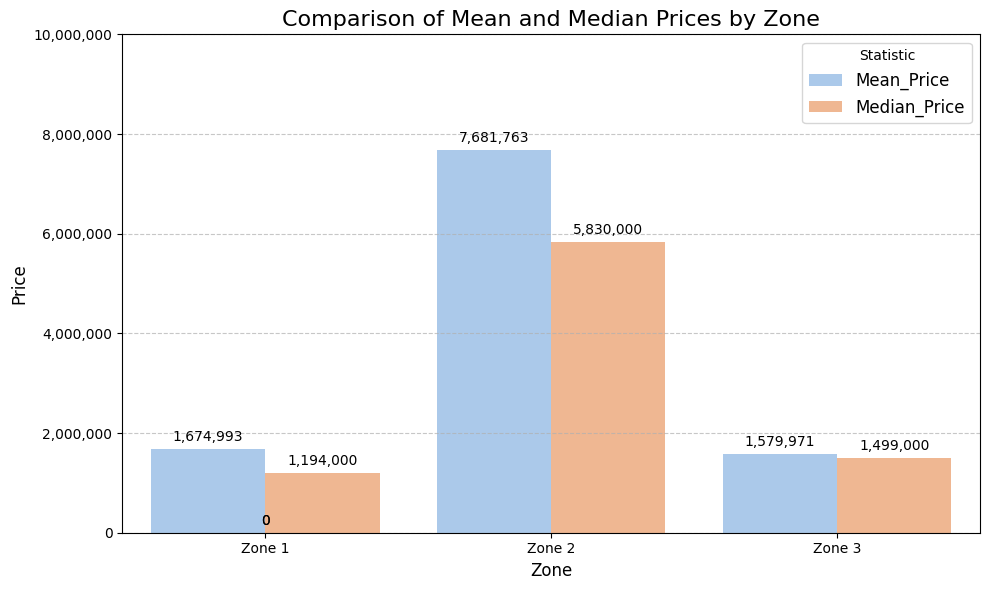

In [20]:
# Create a bar chart with seaborn
plt.figure(figsize=(10, 6))
cluster_summary_melted = cluster_summary.melt(id_vars='Zone', value_vars=['Mean_Price', 'Median_Price'], 
                                              var_name='Statistic', value_name='Price')

# Use seaborn to create the bar plot
sns.barplot(x='Zone', y='Price', hue='Statistic', data=cluster_summary_melted, palette="pastel")

# Get the current axes object
ax = plt.gca()

# Format the y-axis to display thousands
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the y-axis limits if necessary
plt.ylim(0, 10000000)  # Uncomment to set custom limits

# Add mean and median values as annotations
for p in ax.patches:
    value = p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{value:,.0f}', (x + p.get_width() / 2, y + value + 100000), ha='center', va='bottom')

# Customize the plot
plt.title('Comparison of Mean and Median Prices by Zone', fontsize=16)
plt.xlabel('Zone', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Statistic', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.savefig('Distribution_Property_Types.jpg', dpi=100)
plt.show()


C:\Users\jaime\AppData\Local\Temp\ipykernel_16716\3863943174.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=only_coordinates, x='Zone', y='Price', palette="pastel")


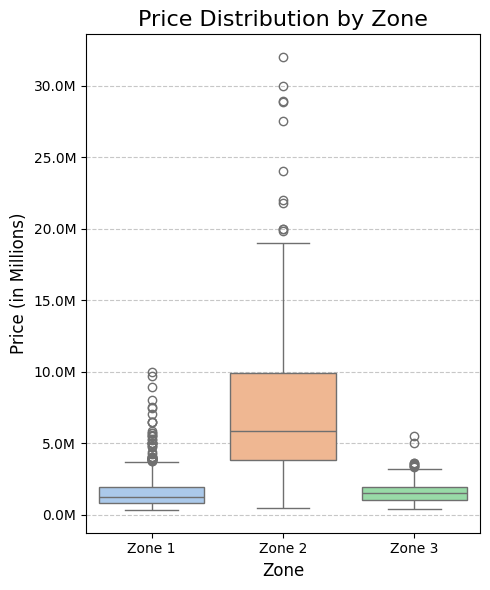

In [21]:
# Create the boxplot
plt.figure(figsize=(5, 6))
sns.boxplot(data=only_coordinates, x='Zone', y='Price', palette="pastel")

# Customize the plot
plt.title('Price Distribution by Zone', fontsize=16)
plt.xlabel('Zone', fontsize=12)
plt.ylabel('Price (in Millions)', fontsize=12)
plt.xticks(rotation=0)

# Format the y-axis to display in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:,.1f}M'))

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.savefig('Price_Distribution_by_Cluster.jpg', dpi=100)
plt.show()
